In [1]:
from keras.layers import Input,Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape = (784,))

encoded = Dense(encoding_dim,activation = 'relu')(input_img)
decoded = Dense(784,activation = 'sigmoid')(encoded)

autoencoder = Model(input_img,decoded)

In [2]:
encoder = Model(input_img,encoded)

In [3]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta',loss = 'binary_crossentropy' )

In [5]:
from keras.datasets import mnist
import numpy as np
(X_train,_),(X_test,_) = mnist.load_data()

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(X_train,X_train,epochs = 50,
               batch_size = 256,shuffle = True,
               validation_data = (X_test,X_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6916 - val_loss: 0.6915
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6914 - val_loss: 0.6913

In [10]:
encoded_imgs = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


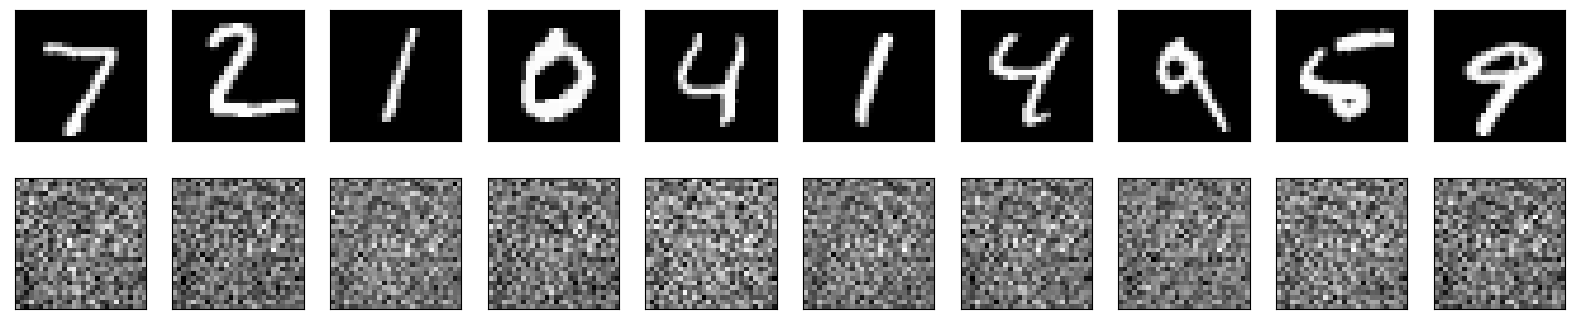

In [13]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i +1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()